## Tobigs 4주차 Ensemble 과제
#### 15기 이윤정
---

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [136]:
train = pd.read_csv('ggstore_train.csv')
test = pd.read_csv('ggstore_test.csv')

ID = test['Id']
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

train

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.00,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.00,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.00,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.00,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.00,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
5611,Dr. Chess,GAME,4.1,97209,6.7,1000000.0,0,0.00,Everyone,Board,2018-01-14
5612,Super Dr. Parking 3D,FAMILY,4.0,4518,41.0,1000000.0,0,0.00,Everyone,Simulation,2017-12-17
5613,Dr Dre - Beatmaker,GAME,4.3,146,6.0,10000.0,0,0.00,Mature 17+,Music,2018-02-28
5614,Dr. Cares - Amy's Pet Clinic 🐈 🐕,FAMILY,4.5,3580,60.0,100000.0,0,0.00,Everyone,Casual,2018-04-30


### 변수 설명
#### 독립 변수
    - App : 어플리케이션명
    - Category : 어플리케이션 카테고리
    - Reviews : 리뷰 개수
    - Size : 어플리케이션 크기
    - Installs : 다운로드 횟수
    - Type : 무료(0), 유료(1)
    - Price : 가격
    - Content Rating : 관람가
    - Genres : 세부 장르
    - Last Updated : 마지막 업데이트
    
#### 종속 변수
    - Rating : 평점

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 482.8+ KB


In [137]:
train['Type'] = train['Type'].astype('str')
test['Type'] = test['Type'].astype('str')

In [5]:
train.describe()

,Rating,Reviews,Size,Installs,Price
count,5616.000000,5.616000e+03,5616.000000,5.616000e+03,5616.000000
mean,4.177386,1.686437e+05,21.831198,5.201445e+06,1.409918
std,0.543153,1.126012e+06,22.744877,3.012485e+07,20.341193
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,4.000000,1.140000e+02,5.100000,1.000000e+04,0.000000
50%,4.300000,2.158000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,3.292125e+04,30.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


In [6]:
train.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

---
### 이상치 처리

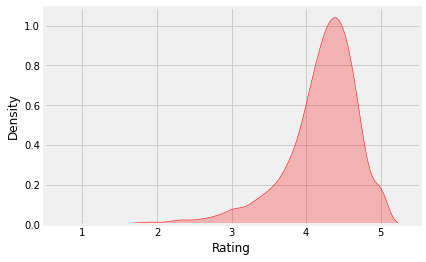

In [7]:
sns.kdeplot(train['Rating'], color="red", shade = True)
plt.show()

평점 4점대에서 5점대 사이의 어플리케이션이 가장 많다

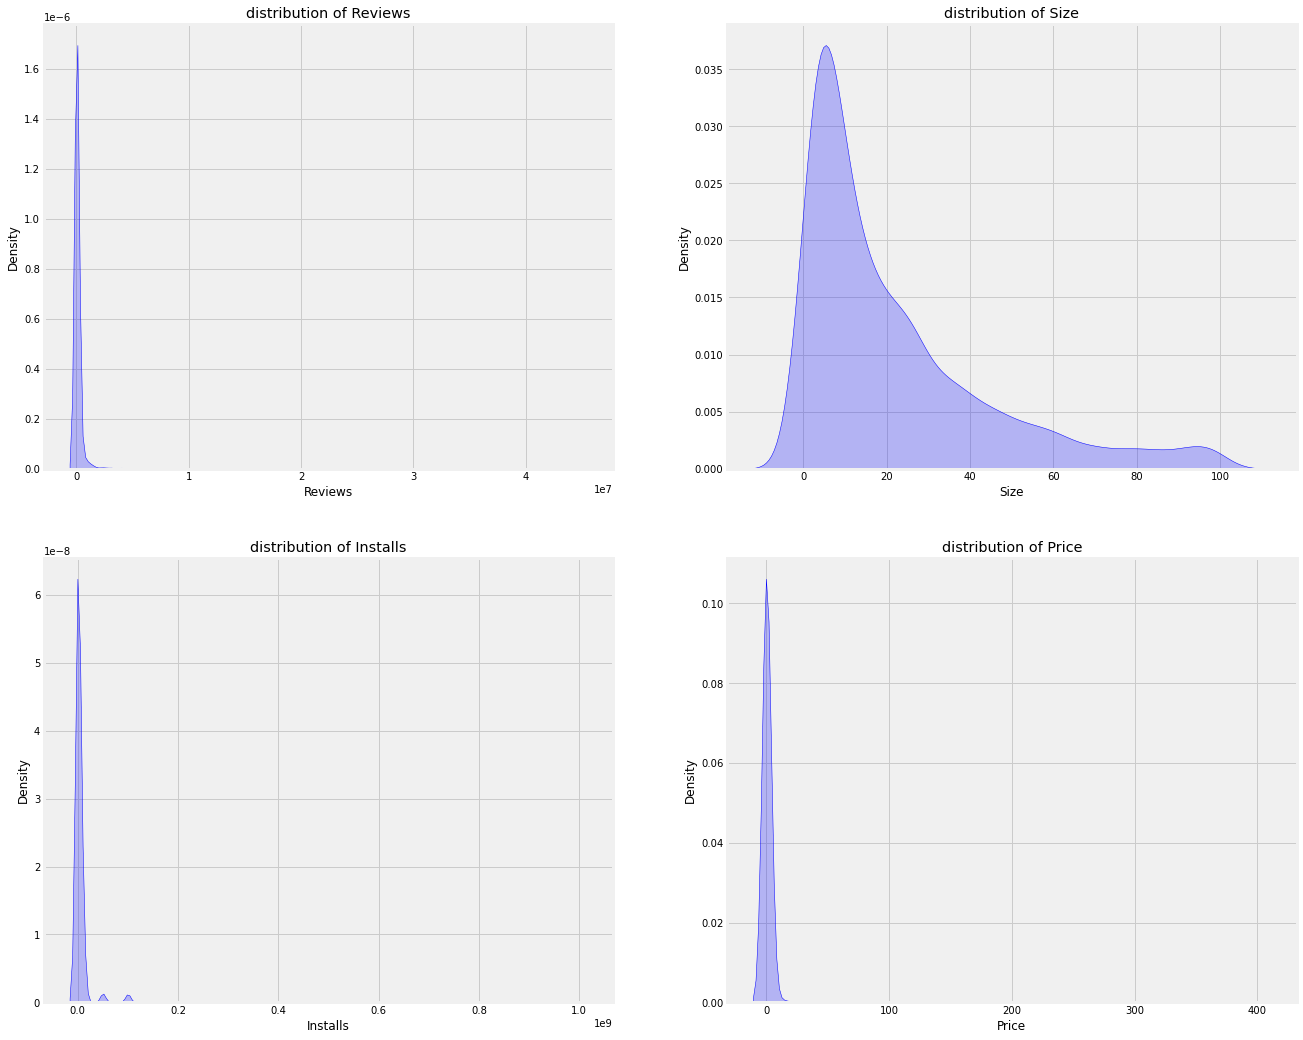

In [8]:
f,ax=plt.subplots(2,2,figsize=(20,18))  #plot field

sns.kdeplot(train['Reviews'], color="blue", shade = True, ax=ax[0,0])
ax[0,0].set_title('distribution of Reviews')

sns.kdeplot(train['Size'], color="blue", shade = True,ax=ax[0,1])
ax[0,1].set_title('distribution of Size')

sns.kdeplot(train['Installs'], color="blue", shade = True,ax=ax[1,0])
ax[1,0].set_title('distribution of Installs')

sns.kdeplot(train['Price'], color="blue", shade = True,ax=ax[1,1])
ax[1,1].set_title('distribution of Price')

plt.show()

수치형 변수의 분포를 보았을 때, 전체적으로 최소값과 최대값의 격차가 매우 큰편이다. 그러나, 상위 데이터를 살펴본 결과 누구나 알정도로 유명한 어플리케이션이 랭크되어있었기 때문에 불가능한 수치라고 생각되지 않으므로 이상치는 존재하지 않는다고 판단하였다.

---
### 범주형 변수 처리
#### 1. Category

In [9]:
train['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

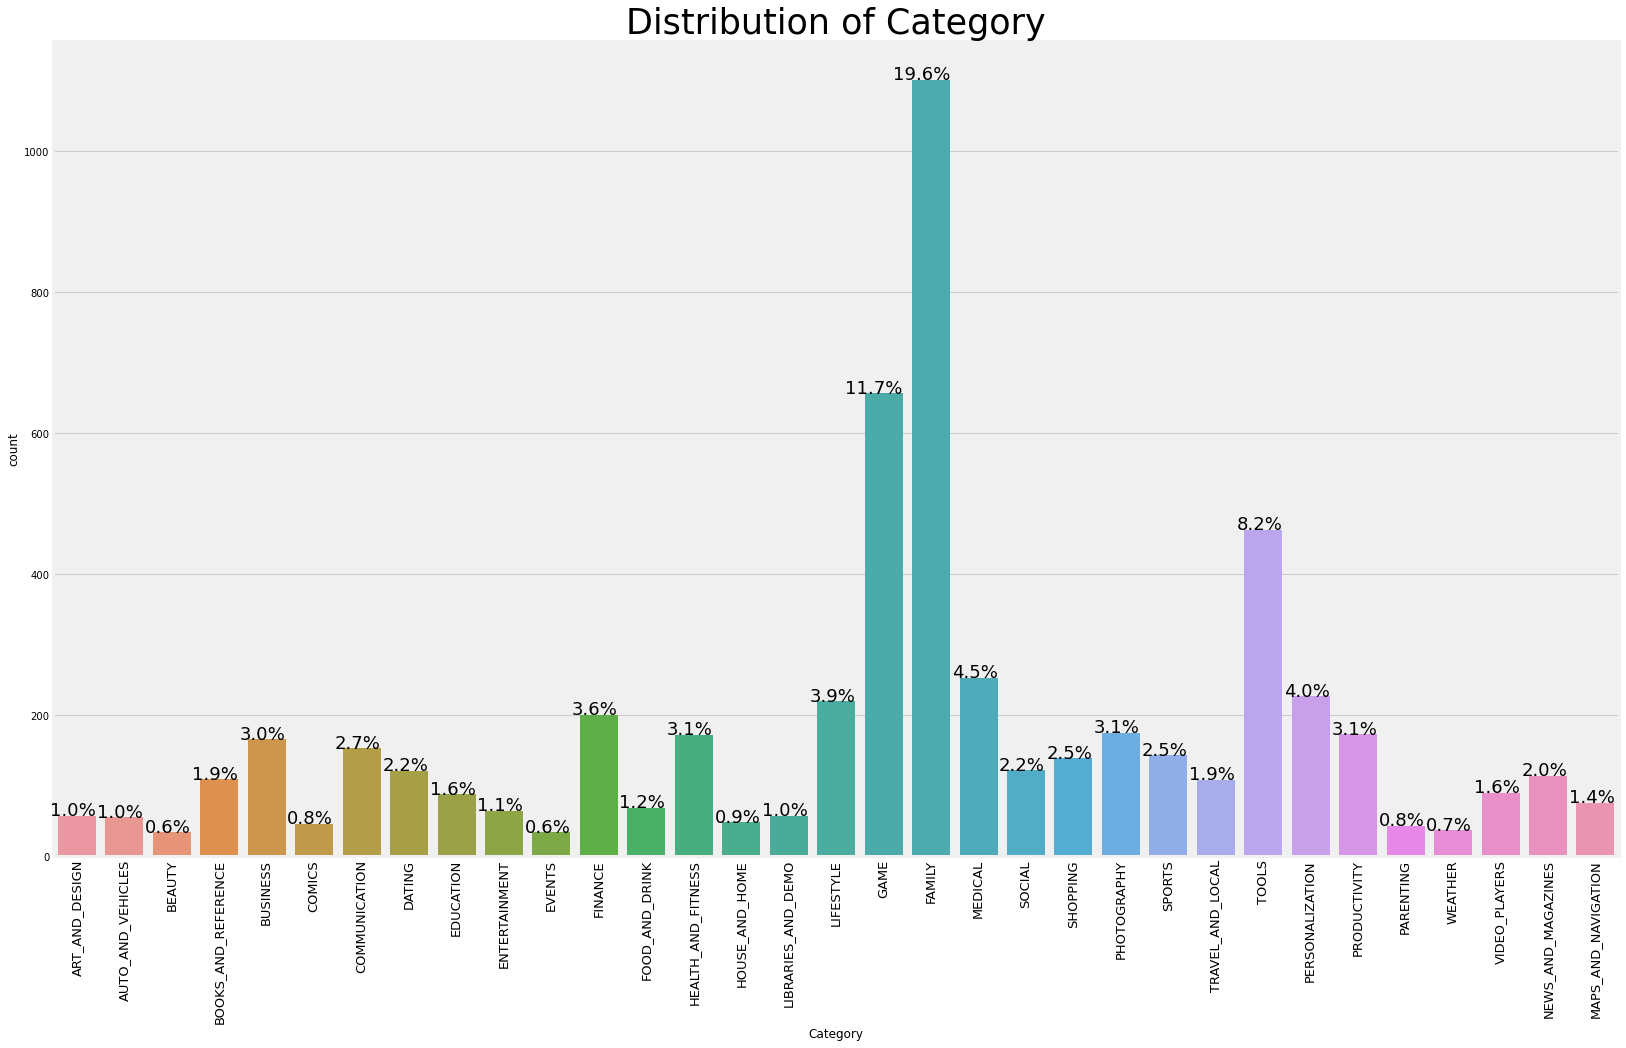

In [10]:
plt.rcParams['figure.figsize'] = (25, 15)
ax = sns.countplot(train['Category'])
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Category', fontsize = 35)

total = float(len(train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='right', size = 18)

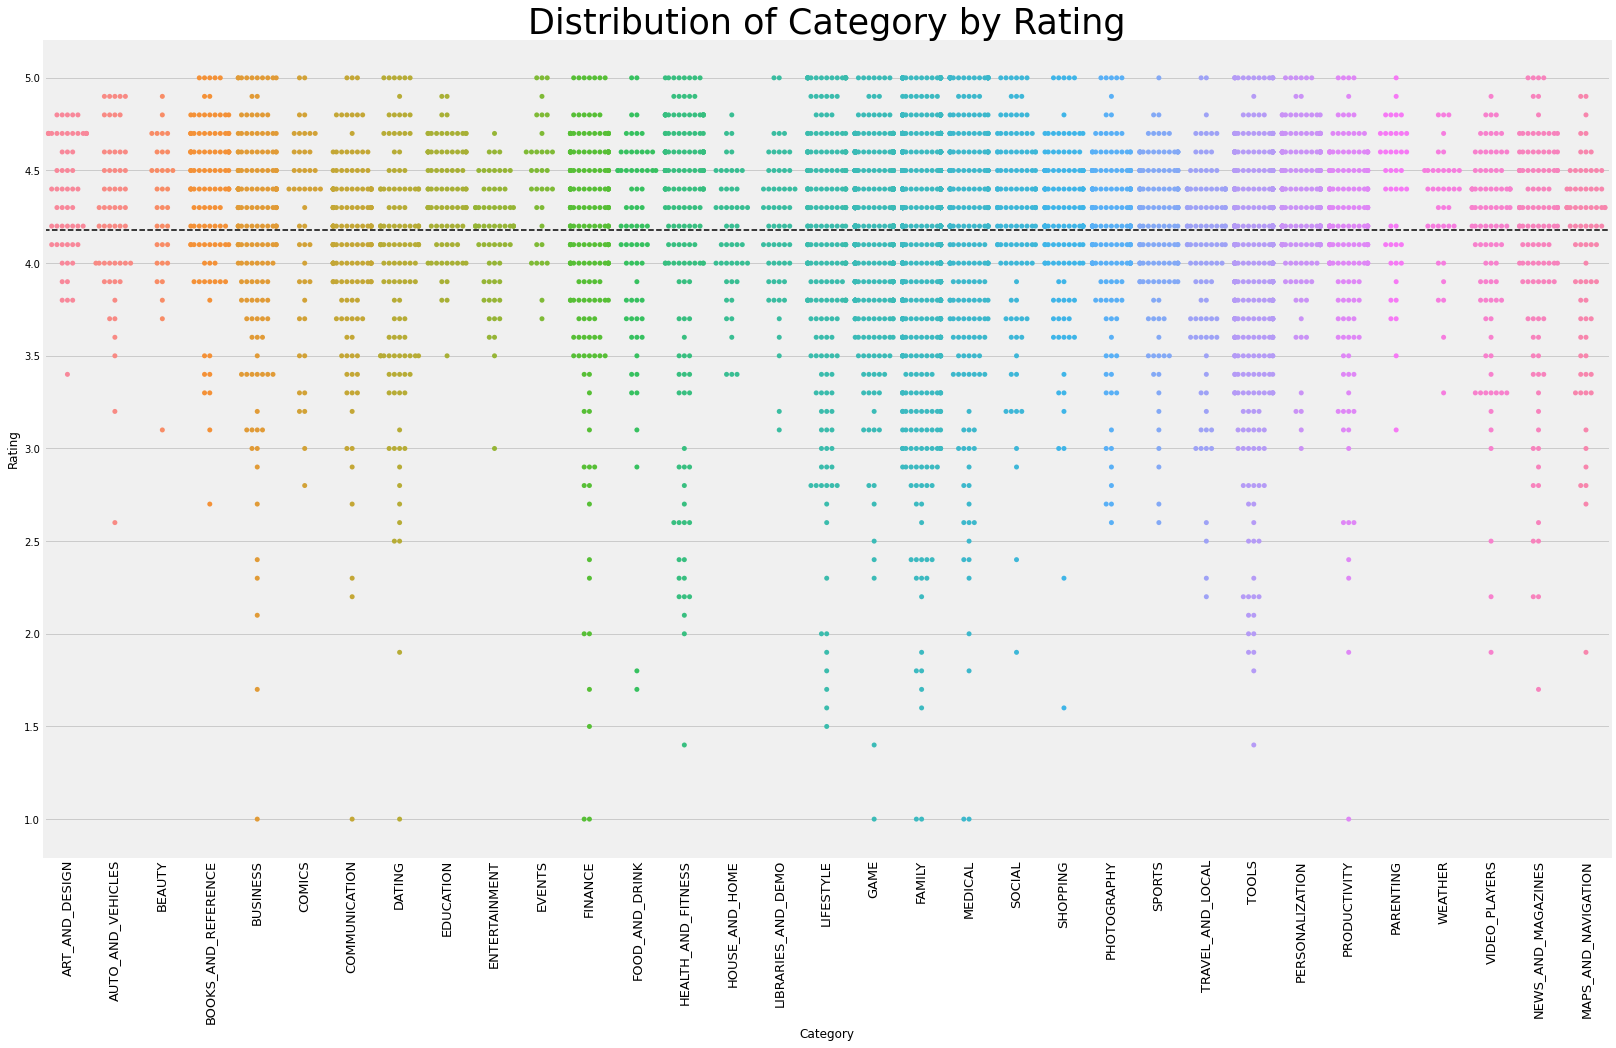

In [11]:
plt.rcParams['figure.figsize'] = (25, 15)
sns.swarmplot(x="Category", y="Rating", data=train)
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Category by Rating', fontsize = 35)

plt.axhline(train['Rating'].mean(),0, 1, color='black', linestyle='--', linewidth='1.5')

전체 변수에서 Category 비율이 1% 미만인 경우 'Others'로 병합

In [138]:
#Genres 변수의 element별 비율 
cat = pd.DataFrame(train['Category'].value_counts(normalize=True))
cat.reset_index(inplace = True)

cat_li = cat[cat['Category']<0.01]

for i in range(0, len(train)):
    for j in cat_li['index'].unique():
        if train['Category'][i] == j:
            train['Category'][i] = 'Others'
            
for i in range(0, len(test)):
    for j in cat_li['index'].unique():
        if test['Category'][i] == j:
            test['Category'][i] = 'Others'

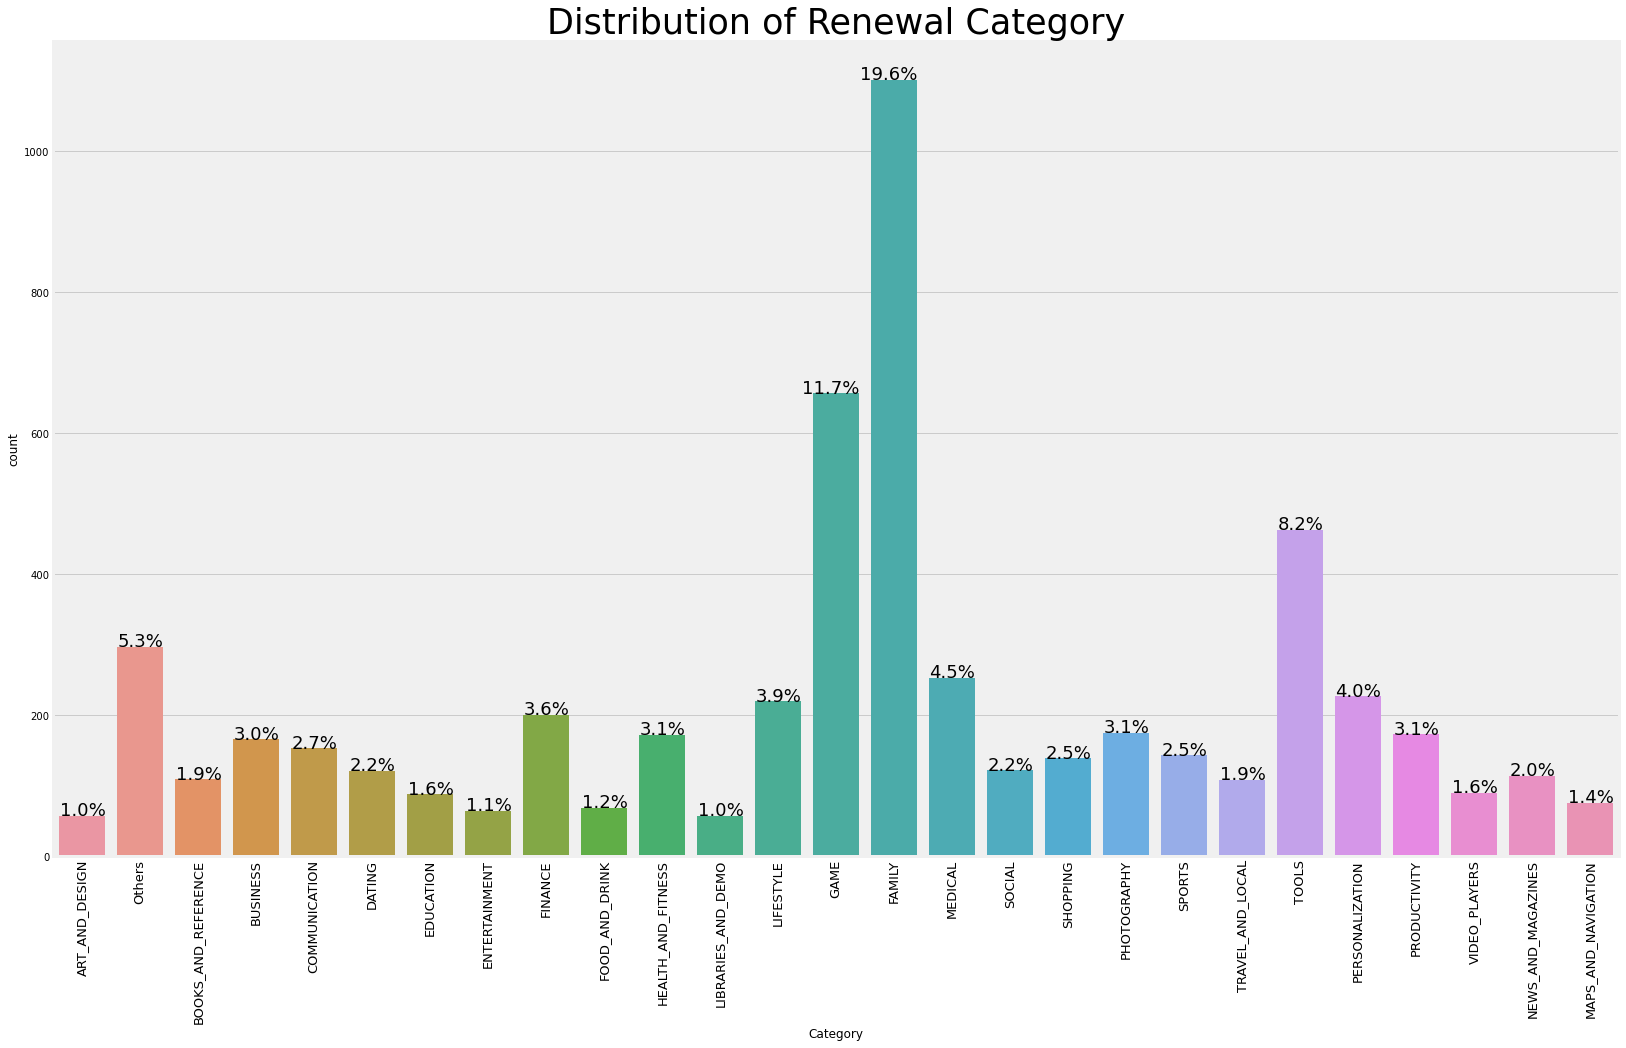

In [13]:
plt.rcParams['figure.figsize'] = (25, 15)
ax = sns.countplot(train['Category'])
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Renewal Category', fontsize = 35)

total = float(len(train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='right', size = 18)

---
#### 2. Type

<AxesSubplot:ylabel='Type'>

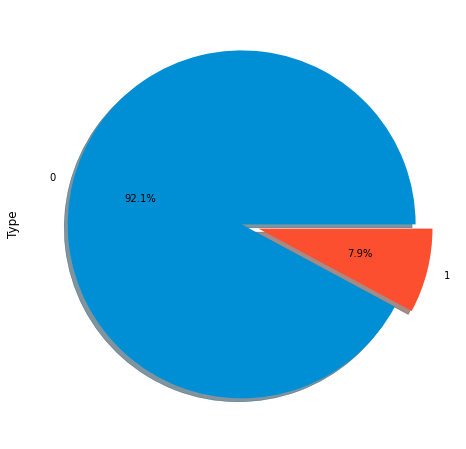

In [14]:
plt.rcParams['figure.figsize'] = (8, 8)
train['Type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

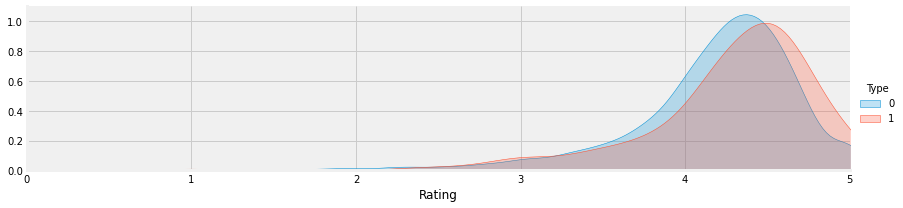

In [15]:
#age - survived 변수 시각화(plot)
facet=sns.FacetGrid(train, hue="Type", aspect=4)
facet.map(sns.kdeplot, 'Rating', shade=True)
facet.set(xlim=(0, train['Rating'].max()))
facet.add_legend()

어플리케이션이 유료일 때가 무료일 때보다 Rating이 높은 편이다. 그러나, 유료/무료의 여부는 Price 변수에서 확인할 수 있으므로 제거한다.

In [139]:
train.drop('Type', axis=1, inplace=True)

---
#### 3. Content Rating

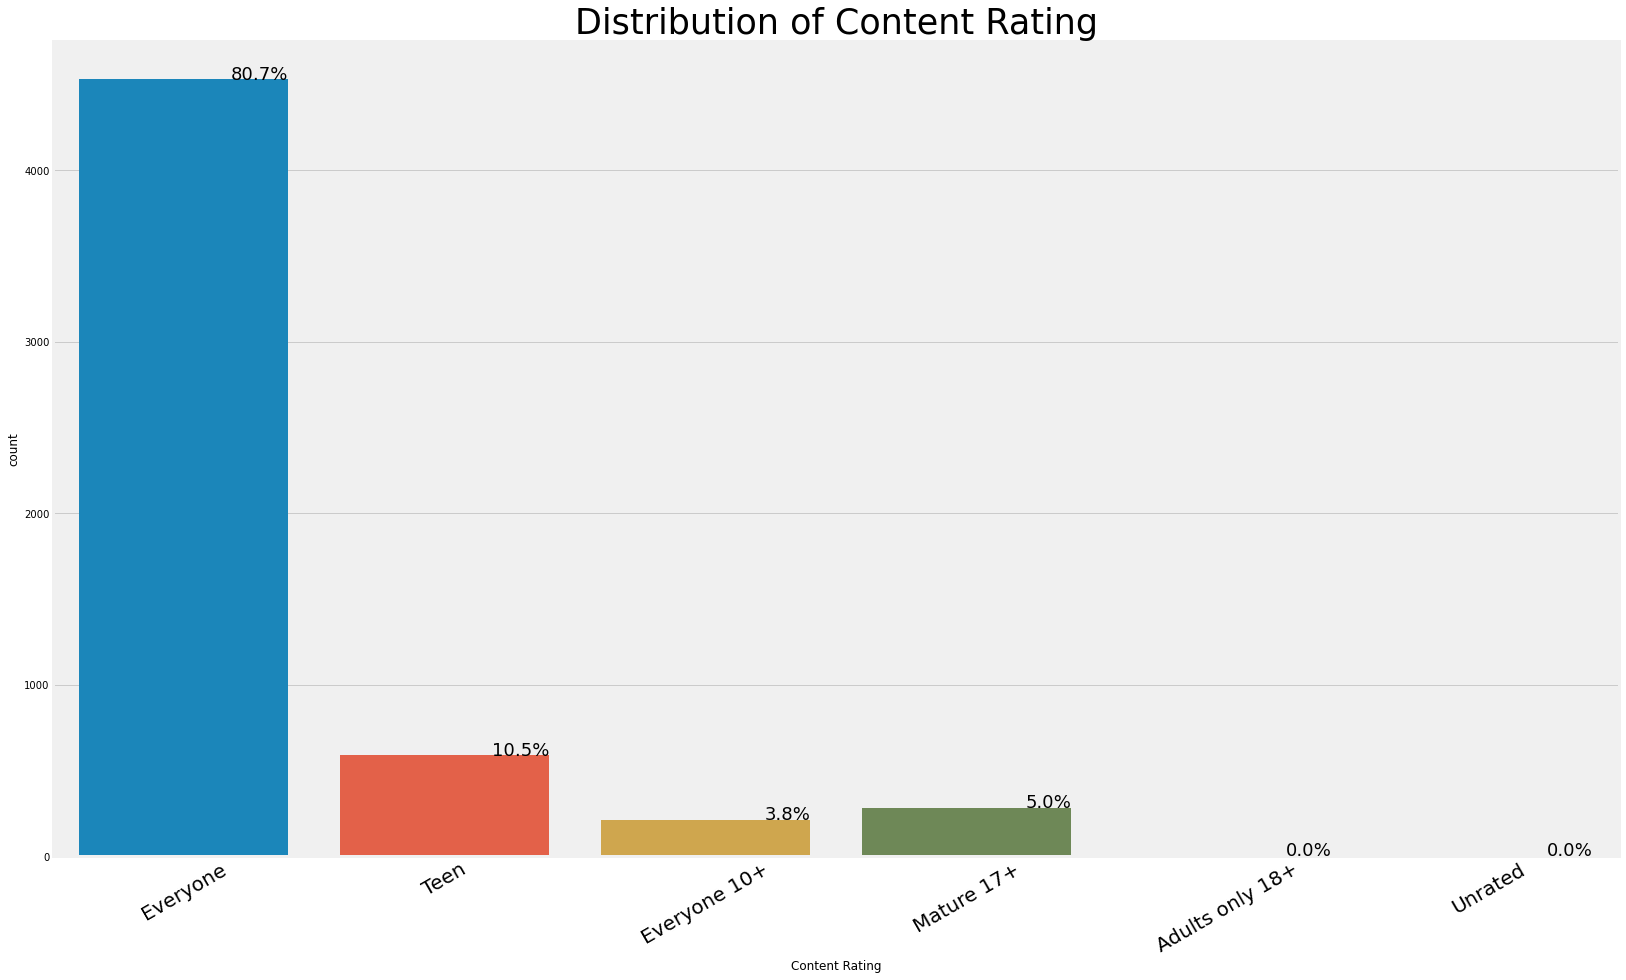

In [17]:
plt.rcParams['figure.figsize'] = (25, 15)
ax = sns.countplot(train['Content Rating'])
plt.xticks(rotation=30, fontsize = 20)
plt.title('Distribution of Content Rating', fontsize = 35)

total = float(len(train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='right', size = 18)

In [18]:
train[train['Content Rating']=='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
197,Manga Master - Best manga & comic reader,Others,4.6,24005,4.9,500000.0,0.0,Adults only 18+,Comics,2018-07-04
1737,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41.0,1000000.0,0.0,Adults only 18+,Sports,2018-07-24


In [19]:
train[train['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
5246,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000.0,0.0,Unrated,Tools,2012-02-27


해당 관람가는 극소수이므로 Others로 병합

In [140]:
for i in range(0, len(train)):
    if train['Content Rating'][i]=='Unrated':
        train['Content Rating'][i]= 'Others'
    elif train['Content Rating'][i]=='Adults only 18+':
        train['Content Rating'][i]= 'Others'
        
for i in range(0, len(test)):
    if test['Content Rating'][i]=='Unrated':
        test['Content Rating'][i]= 'Others'
    elif test['Content Rating'][i]=='Adults only 18+':
        test['Content Rating'][i]= 'Others'

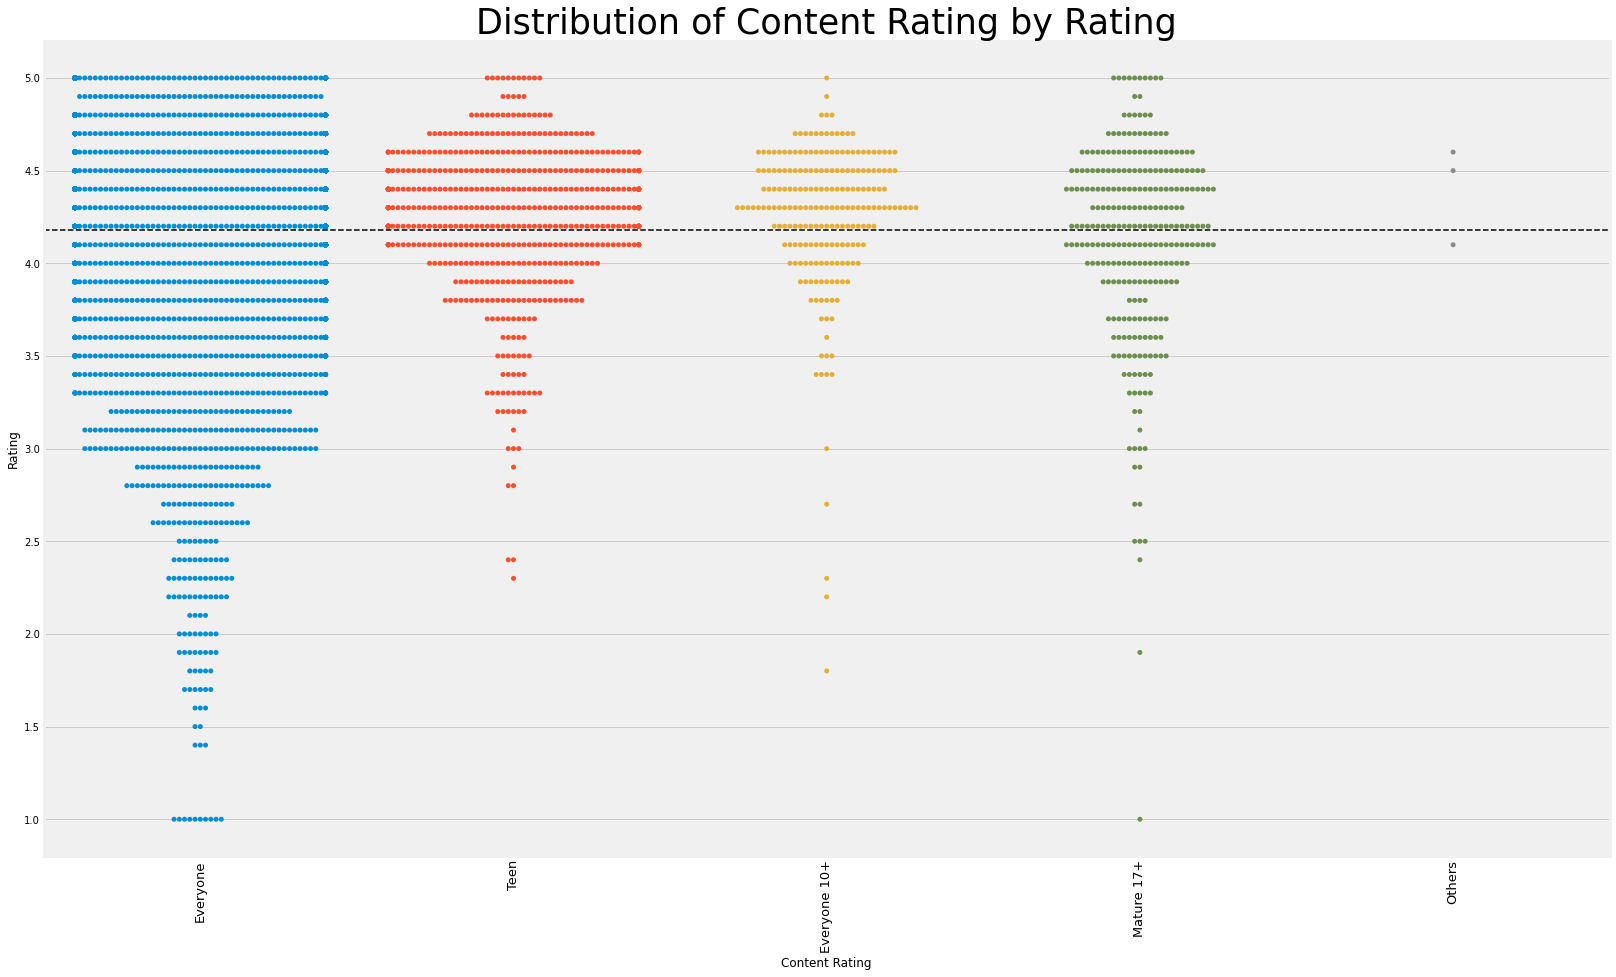

In [21]:
plt.rcParams['figure.figsize'] = (25, 15)
sns.swarmplot(x="Content Rating", y="Rating", data=train)
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Content Rating by Rating', fontsize = 35)

plt.axhline(train['Rating'].mean(),0, 1, color='black', linestyle='--', linewidth='1.5')

----
#### 4. Genres

In [22]:
train['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

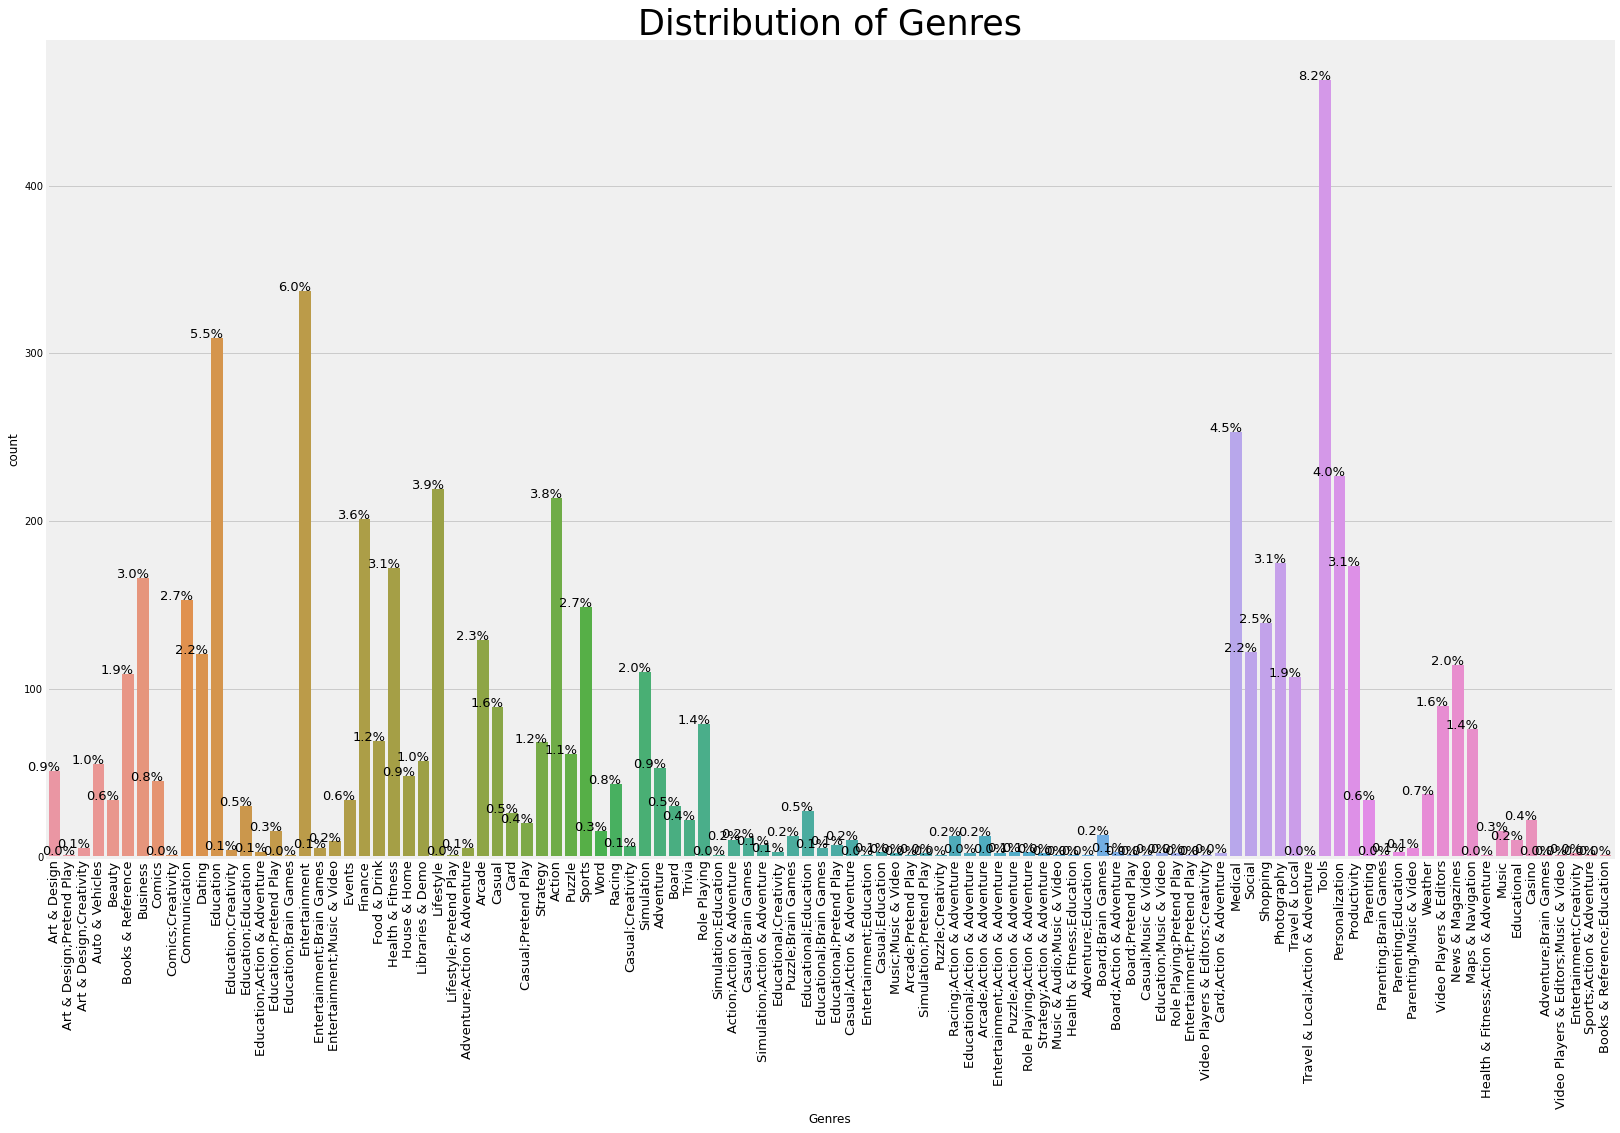

In [23]:
plt.rcParams['figure.figsize'] = (25, 15)
ax = sns.countplot(train['Genres'])
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Genres', fontsize = 35)

total = float(len(train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='right', size = 13)

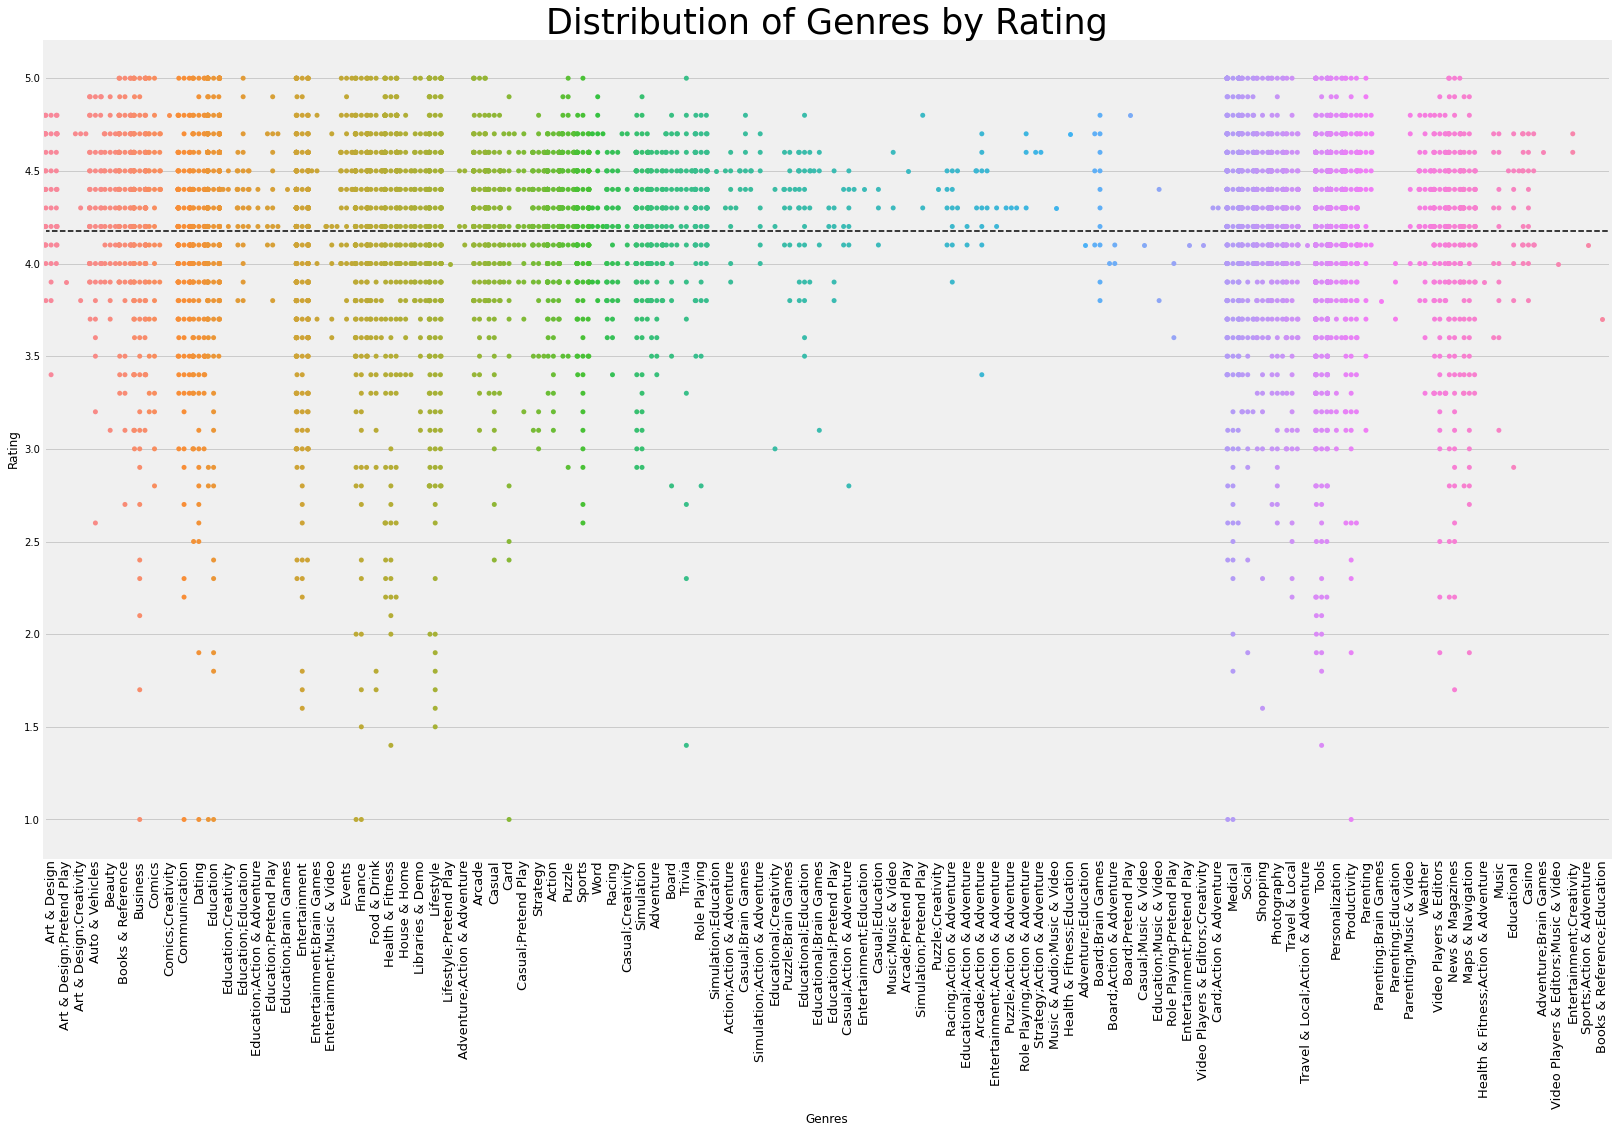

In [24]:
plt.rcParams['figure.figsize'] = (25, 15)
sns.swarmplot(x="Genres", y="Rating", data=train)
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Genres by Rating', fontsize = 35)

plt.axhline(train['Rating'].mean(),0, 1, color='black', linestyle='--', linewidth='1.5')

장르별 어플리케이션 분포를 보았을 때, 매우 다양한 세부 장르로 나뉘어지고 있으므로 세분화된 장르를 합친다. 

In [141]:
#':' 문자를 split
train['Genres'] = train['Genres'].str.split(';').str[0]
test['Genres'] = test['Genres'].str.split(';').str[0]

In [142]:
#Music과 Music & Audio 병합
train['Genres'].replace('Music & Audio', 'Music',inplace = True)
test['Genres'].replace('Music & Audio', 'Music',inplace = True)

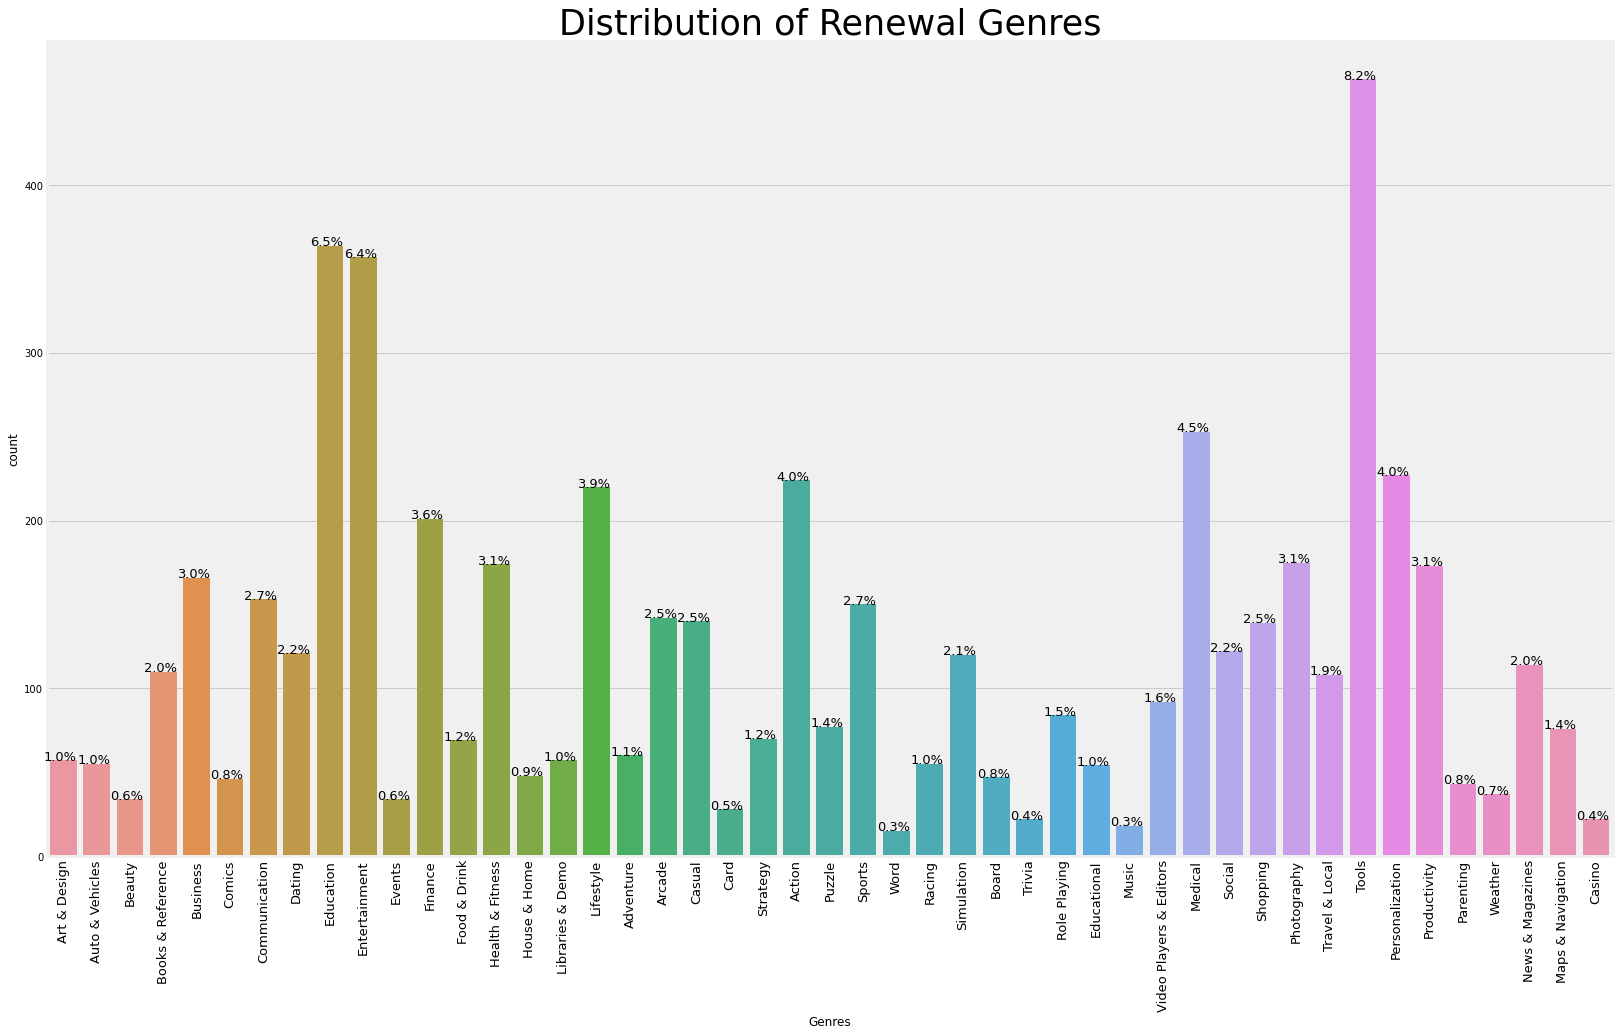

In [27]:
plt.rcParams['figure.figsize'] = (25, 15)
ax = sns.countplot(train['Genres'])
plt.xticks(rotation=90, fontsize = 13)
plt.title('Distribution of Renewal Genres', fontsize = 35)

total = float(len(train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='right', size = 13)

----
#### 4. Last Updated

In [28]:
train['Last Updated'].sort_values()

4661    2010-05-21
4625    2011-01-30
5342    2011-04-11
5127    2011-04-16
3094    2011-05-12
           ...    
2022    2018-08-07
5584    2018-08-07
2164    2018-08-07
1874    2018-08-07
2083    2018-08-07
Name: Last Updated, Length: 5616, dtype: object

Last Updated 변수를 정렬한 결과, 2018-08-07이 가장 최신 일자임을 알 수 있다. 그러므로, 해당 데이터를 수집한 일자를 2018-08-08로 가정한다. Last Updated 변수는 날짜 변수로 다루기 까다롭기 때문에, 데이터를 수집한 일자를 기준으로 얼마나 떨어져 있는 지로 대체한다.( = 수치형 변수)

In [143]:
train['Updated Day'] = abs((pd.to_datetime(train['Last Updated']) - pd.to_datetime('2018-08-08'))).dt.days.astype(int)
test['Updated Day'] = abs((pd.to_datetime(test['Last Updated']) - pd.to_datetime('2018-08-08'))).dt.days.astype(int)

In [144]:
train.drop('Last Updated', axis=1, inplace=True)
test.drop('Last Updated', axis=1, inplace=True)

---
### 범주형 변수 Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [145]:
#categorical feature 전처리
le = LabelEncoder()

for i in train.columns[train.dtypes == "object"]:
    train[i] = le.fit_transform(train[i])
    
for i in test.columns[test.dtypes == "object"]:
    test[i] = le.fit_transform(test[i])
    
train

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Updated Day
0,3998,0,4.1,159,19.0,10000.0,0.00,0,3,213
1,1755,0,3.9,967,14.0,500000.0,0.00,0,3,205
2,5034,0,4.7,87510,8.7,5000000.0,0.00,0,3,7
3,4531,0,4.5,215644,25.0,50000000.0,0.00,4,3,61
4,4031,0,4.3,967,2.8,100000.0,0.00,0,3,49
...,...,...,...,...,...,...,...,...,...,...
5611,2161,10,4.1,97209,6.7,1000000.0,0.00,0,6,206
5612,4707,7,4.0,4518,41.0,1000000.0,0.00,0,37,234
5613,2156,10,4.3,146,6.0,10000.0,0.00,2,27,161
5614,2159,7,4.5,3580,60.0,100000.0,0.00,0,11,100


---
### Scaling
수치형 변수 간의 범위 차가 매우 크므로 scaling 진행

In [146]:
#scaling
from sklearn.preprocessing import RobustScaler

nonscl = ['App', 'Category', 'Content Rating', 'Genres', 'Rating']
testscl = ['App', 'Category', 'Content Rating', 'Genres']
scl = ['Reviews', 'Size', 'Installs', 'Price', 'Updated Day']

scaler = RobustScaler()
robust_tr = pd.DataFrame(scaler.fit_transform(train[scl]), columns=scl)
robust_te = pd.DataFrame(scaler.transform(test[scl]), columns=scl)

train = pd.concat([train[nonscl], robust_tr], axis=1)
test = pd.concat([test[testscl], robust_te], axis=1)

In [34]:
train

,App,Category,Content Rating,Genres,Rating,Reviews,Size,Installs,Price,Updated Day
0,3998,0,0,3,4.1,-0.060932,0.240964,-0.090909,0.00,0.379133
1,1755,0,0,3,3.9,-0.036303,0.040161,0.404040,0.00,0.355621
2,5034,0,0,3,4.7,2.601620,-0.172691,4.949495,0.00,-0.226304
3,4531,0,4,3,4.5,6.507281,0.481928,50.404040,0.00,-0.067597
4,4031,0,0,3,4.3,-0.036303,-0.409639,0.000000,0.00,-0.102866
...,...,...,...,...,...,...,...,...,...,...
5611,2161,10,0,6,4.1,2.897256,-0.253012,0.909091,0.00,0.358560
5612,4707,7,0,37,4.0,0.071935,1.124498,0.909091,0.00,0.440852
5613,2156,10,2,27,4.3,-0.061328,-0.281124,-0.090909,0.00,0.226304
5614,2159,7,0,11,4.5,0.043344,1.887550,0.000000,0.00,0.047024


---
### Modeling

In [121]:
# sklearn 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [147]:
#split (8:2)
X = train.drop('Rating', axis=1)
y = train['Rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=777)

#### Metric : rmse

In [37]:
n_folds = 5
train = X

def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [38]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

---
#### Ridge Regression

In [165]:
from sklearn.linear_model import Ridge

# Train model with default alpha=1
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

score = rmse_cv(ridge)     
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.5465 (0.0166)



In [166]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.018647495139685222
Best Params:  {'alpha': 100}


[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    3.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.3s finished


In [167]:
best_ridge = Ridge(alpha=100)
best_ridge.fit(X_train, y_train)

score = rmse_cv(best_ridge)     
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.5465 (0.0166)



#### Lasso Regression

In [168]:
from sklearn.linear_model import Lasso

# Train model with default alpha=1
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

score = rmse_cv(lasso)     
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.5516 (0.0188)



In [68]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score:  0.018594807584752442
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [112]:
best_lasso = Lasso(alpha=0.001)
best_lasso.fit(X_train, y_train)

score = rmse_cv(best_lasso)     
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.5465 (0.0166)



#### Elastic-Net Regression

In [169]:
from sklearn.linear_model import ElasticNet

# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

score = rmse_cv(elastic_net)     
print("\nElastic-Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic-Net Regression score: 0.5512 (0.0188)



In [71]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Best Score:  0.018691060483006432
Best Params:  {'alpha': 0.1, 'l1_ratio': 0}


[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    0.5s finished


In [113]:
best_Enet = ElasticNet(alpha=0.1, l1_ratio=0)
best_Enet.fit(X_train, y_train)

score = rmse_cv(best_Enet)     
print("\nElastic-Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic-Net Regression score: 0.5465 (0.0167)



#### SVM (SVR)

In [170]:
svr = SVR(kernel='rbf', gamma=1, C=1)
svr.fit(X_train, y_train)

score = rmse_cv(svr)     
print("\nSVM Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM Regression score: 0.5498 (0.0194)



In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Instantiate the grid search model
grid = GridSearchCV(estimator = svr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:   25.3s finished


Best Score:  0.024356422414034906
Best Params:  {'C': 1, 'gamma': 0.1}


In [114]:
best_svr = SVR(gamma=0.1, C=1)
best_svr.fit(X_train, y_train)

score = rmse_cv(best_svr)     
print("\nSVM Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM Regression score: 0.5463 (0.0191)



#### RandomForest

In [171]:
# Create a based model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

score = rmse_cv(rf)     
print("\nRandom Forest Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest Regression score: 0.5252 (0.0208)



In [77]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.9min finished


Best Score:  0.11288766133064794
Best Params:  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}


In [115]:
best_rf = RandomForestRegressor(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
best_rf.fit(X_train, y_train)

score = rmse_cv(best_rf)     
print("\nRandomForest Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForest Regression score: 0.5177 (0.0208)



#### Gradient Boosting

In [172]:
# Create a based model
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

score = rmse_cv(gbm)     
print("\nGradient Boosting Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting Regression score: 0.5128 (0.0194)



In [86]:
param_grid = { 
    "n_estimators": range(50, 100, 25), 
    "max_depth": [1, 2, 4], 
    "learning_rate": [0.0001, 0.001, 0.01, 0.1], 
    "subsample": [0.7, 0.9]
}

# Instantiate the grid search model
grid = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    4.0s finished


Best Score:  0.12083369906081894
Best Params:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.7}


In [116]:
best_gbm = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.7)
best_gbm.fit(X_train, y_train)

score = rmse_cv(best_gbm)     
print("\nGradient Boosting Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting Regression score: 0.5159 (0.0207)



#### XGBoost

In [173]:
# Create a based model
xgr = xgb.XGBRegressor()
xgr.fit(X_train.values, y_train.values)

score = rmse_cv(xgr)     
print("\nXGBoost Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost Regression score: 0.5461 (0.0280)



In [162]:
param_grid = { 
    'max_depth': (5, 10),
    'learning_rate': (0.01, 1),
    'n_estimators': (50, 1000),
    'gamma': (1, 0.01),
    'min_child_weight': (2, 10),
    'max_delta_step': (0, 0.1),
    'subsample': (0.7, 0.8),
    'colsample_bytree' :(0.5, 0.99)
}

# Instantiate the grid search model
grid = GridSearchCV(estimator = xgr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_result = grid.fit(X_train.values, y_train.values)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  5.8min finished


Best Score:  0.10670673396226067
Best Params:  {'colsample_bytree': 0.99, 'gamma': 0.01, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 1000, 'subsample': 0.8}


In [163]:
best_xgr = xgb.XGBRegressor(colsample_bytree=0.99, gamma=0.01, learning_rate=0.01, max_delta_step=0, max_depth=5, min_child_weight=10, n_estimators=1000, subsample=0.8)
best_xgr.fit(X_train.values, y_train.values)

score = rmse_cv(best_xgr)     
print("\nXGBoost Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost Regression score: 0.5157 (0.0213)



#### LGBM

In [174]:
# Create a based model
lgbr = lgb.LGBMRegressor()
lgbr.fit(X_train, y_train)

score = rmse_cv(lgbr)     
print("\nLGBM Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM Regression score: 0.5239 (0.0174)



In [93]:
param_grid = { 
    'learning_rate': (0.01, 1),
    'n_estimators': (50, 1000),
    'max_depth': (5, 10),
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'colsample_bytree' : [0.65, 1.65],
    'subsample' : [0.7,0.75]
}

# Instantiate the grid search model
grid = GridSearchCV(estimator = lgbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   15.4s finished


Best Score:  0.11341798540197263
Best Params:  {'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 8, 'objective': 'regression', 'subsample': 0.7}


In [118]:
best_lgbr = lgb.LGBMRegressor(boosting_type='gbdt', colsample_bytree=0.65, learning_rate=0.01, max_depth=5, n_estimators=1000, num_leaves=8, objective='regression', subsample=0.7)
best_lgbr.fit(X_train, y_train)

score = rmse_cv(best_lgbr)     
print("\nLGBM Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM Regression score: 0.5153 (0.0187)



---
### Stacking
basic & cv 기반
* Averaged base models class

In [196]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [197]:
averaged_models = AveragingModels(models = (best_xgr, best_rf, best_gbm))

score = rmse_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.5144 (0.0194)



---
### Less simple Stacking : Adding a Meta-model  
* KFold 기반 Stacking

In [179]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=10):
  kfold = KFold(n_splits = n_folds, random_state = 1004)
  
  train_fold_predict = np.zeros((X_train.shape[0],1))
  test_predict = np.zeros((X_test.shape[0], n_folds))
  print('model : ',model.__class__.__name__)
  
  for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_train_ = X_train.iloc[train_index]
    y_train_ = y_train.iloc[train_index]
    X_valid = X_train.iloc[valid_index]

    # 학습
    model.fit(X_train_,y_train_)
    train_fold_predict[valid_index,:] = model.predict(X_valid).reshape(-1,1)
    test_predict[:,cnt] = model.predict(X_test)
  
  test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
  
  return train_fold_predict, test_predict_mean

In [200]:
# 앙상블 수행 XGBoost, GBM, RF ->  lgbm
xgr_train, xgr_test = get_stacking_data(best_xgr, X_train, y_train, X_test)
gbm_train, gbm_test = get_stacking_data(best_gbm, X_train, y_train, X_test)
rf_train, rf_test = get_stacking_data(best_rf, X_train, y_train, X_test)

model :  XGBRegressor
model :  GradientBoostingRegressor
model :  RandomForestRegressor


In [201]:
# return 된 kfold 결과와 X_test 결과를 skacking
new_X_train = np.concatenate((xgr_train,gbm_train,rf_train), axis=1)
new_X_test = np.concatenate((xgr_test,gbm_test,rf_test), axis=1)

print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3931, 9) (1685, 9)
새로운 :  (3931, 3) (1685, 3)


In [202]:
best_lgbr.fit(new_X_train,y_train)
stack_pred = best_lgbr.predict(new_X_test)

print("\n Final score: {:.4f}".format(rmse(y_test,stack_pred)))


 Final score: 0.4812


---
* sklearn.ensemble.StackingRegressor  

In [204]:
from sklearn.ensemble import StackingRegressor

# 파라미터 설정
estimators = [
    ('best_xgr',best_xgr),
    ('best_rf',best_rf),
    ('best_gbm',best_gbm)
]

# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = lgb.LGBMRegressor(boosting_type='gbdt', colsample_bytree=0.65, learning_rate=0.01, max_depth=5, n_estimators=1000, num_leaves=8, objective='regression', subsample=0.7),
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('best_xgr',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.99, gamma=0.01,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=10, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=1000, n...
                              ('best_rf',
                               RandomForestRegressor(max_depth=90,
                              

In [205]:
# rmse
rmse(y_test,reg.predict(X_test))

0.47719351458679654

---
### Final

* Ensemble prediction + Submission - 1
    > 0.59183

In [206]:
# reg.fit(X_train, y_train)
# ensemble = reg.predict(test)

# sub = pd.DataFrame()
# sub['Id'] = ID
# sub['Rating'] = ensemble
# sub.to_csv('submission.csv',index=False)

* Ensemble prediction + Submission - 2
    > 0.58635

In [210]:
averaged_models.fit(X_train, y_train)
ensemble = averaged_models.predict(test)

In [211]:
sub = pd.DataFrame()
sub['Id'] = ID
sub['Rating'] = ensemble
sub.to_csv('submission.csv',index=False)